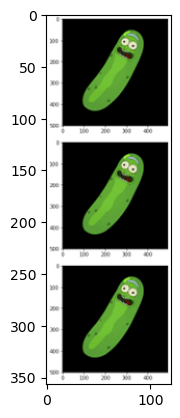

(119, 120, 4)

In [41]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os

loc_input_img = os.path.join('image_raw.png')
i=Image.open(loc_input_img)
np_image = np.array(i)
#plt.imshow(np_image)
#plt.show()

matrix=[0,0,0]
def grid_with_flips(image, matrix):
    hstacksize=matrix.shape[0]
    vstacksize=matrix.shape[1]
    s1 = np.vstack((np_image, np_image, np_image))   
    return s1

plt.imshow(s1)
plt.show()
np_image.shape

2
4


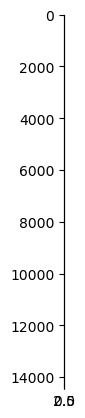

(119, 120, 4)

In [54]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os

loc_input_img = os.path.join('image_raw.png')
i=Image.open(loc_input_img)
np_image = np.array(i)
#plt.imshow(np_image)
#plt.show()

matrix= np.array([[0,0,0,0], [0,0,0,0]])
def grid_with_flips(image, matrix):
    hstacksize=matrix.shape[0]
    print(hstacksize)
    vstacksize=matrix.shape[1]
    print(vstacksize)  
    return np.vstack((np_image*hstacksize)) 
a=grid_with_flips(np_image, matrix)
plt.imshow(a)
plt.show()
np_image.shape

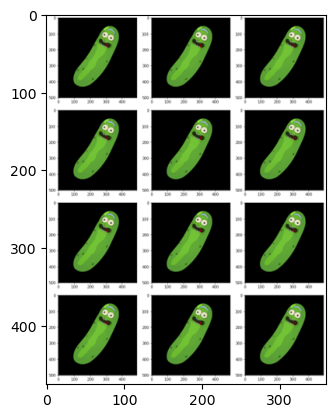

(119, 120, 4)

In [90]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os

loc_input_img = os.path.join('image_raw.png')
i=Image.open(loc_input_img)
np_image = np.array(i)
#plt.imshow(np_image)
#plt.show()


#creer matrix van images
#----------------------------
matrix= np.array([[0,0,0,0], [0,0,0,0], [0,0,0,0]])
def maak_matrix(matrix):
    hstacksize=matrix.shape[0]
    vstacksize=matrix.shape[1] 
    rows = np_image
    for i in range(vstacksize-1):
        if rows.size > 1:
            rows=np.vstack((rows,np_image))
    columns=rows
    for i in range(hstacksize-1):
        columns=np.hstack((columns,rows)) 
    return columns

plt.imshow(maak_matrix(matrix))
plt.show()
np_image.shape

In [94]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os

loc_input_img = os.path.join('image_raw.png')
i=Image.open(loc_input_img)
np_image = np.array(i)
#plt.imshow(np_image)
#plt.show()


#creer matrix van images
#----------------------------
matrix= np.array([[0,0,0], [0,0,0]])
def maak_matrix(matrix):
    hstacksize=matrix.shape[0]
    vstacksize=matrix.shape[1] 
    rows = np_image
    for i in range(vstacksize-1):
        if rows.size > 1:
            rows=np.vstack((rows,np_image))
    columns=rows
    for i in range(hstacksize-1):
        columns=np.hstack((columns,rows)) 
    return columns

filtered_data = [
np_image if operatie == 0 else np_image  for operatie in matrix
]

plt.imshow(filtered_data)
plt.show()
np_image.shape

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()